# Exercise 8: Plotting with `matplotlib`

## Aim: Use `pyplot` to create time series plots.

### Issues covered:
- Import `pyplot` from `matplotlib`
- Create a basic time series plot from lists
- Create a plot from a `pandas` DataFrame
- Plot multiple series on one graph
- Create different kinds of plots - including scatter and bar graphs

## 1. Create a simple time series from a list

Import `matplotlib.pyplot` as `plt`, then create two datasets - one for the time values `[0, 10, 20, 30]`, and one for the positions with the value `[0, 200, 400, 600]`.

In [1]:
import matplotlib.pyplot as plt
time = [0,10,20,30]
val = [0,200,400,600]
print(type(time))

<class 'list'>


Plot the data using `plt.plot()` and add axis labels.

Text(0, 0.5, 'position (m)')

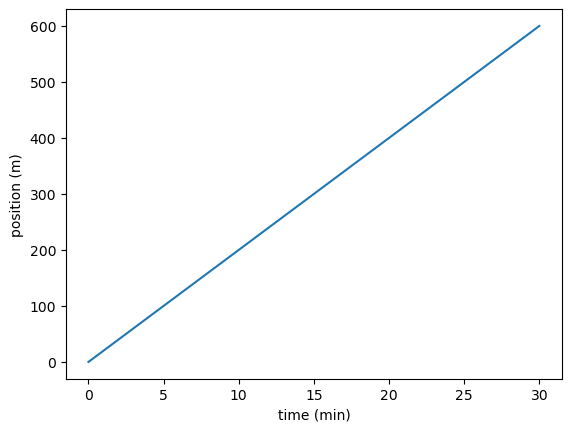

In [2]:
plt.plot(time,val)
plt.xlabel('time (min)')
plt.ylabel ('position (m)')

## 2. Create a plot from a DataFrame

Create a dataframe that we will use to make a plot. Use the file `data/oceania_gdp` and index it by country. 

In [24]:
import pandas as pd
gdp_oc = pd.read_csv('data/oceania_gdp.csv', index_col = 'country')
print(gdp_oc)

             gdpPercap_1952  gdpPercap_1957  gdpPercap_1962  gdpPercap_1967  \
country                                                                       
Australia       10039.59564     10949.64959     12217.22686     14526.12465   
New Zealand     10556.57566     12247.39532     13175.67800     14463.91893   

             gdpPercap_1972  gdpPercap_1977  gdpPercap_1982  gdpPercap_1987  \
country                                                                       
Australia       16788.62948     18334.19751     19477.00928     21888.88903   
New Zealand     16046.03728     16233.71770     17632.41040     19007.19129   

             gdpPercap_1992  gdpPercap_1997  gdpPercap_2002  gdpPercap_2007  
country                                                                      
Australia       23424.76683     26997.93657     30687.75473     34435.36744  
New Zealand     18363.32494     21050.41377     23189.80135     25185.00911  


Extract the year from the last 4 characters of the column names using:
```
data.columns.str.replace('gdpPercap_', '')
```

In [25]:
year = gdp_oc.columns.str.replace('gdpPercap_',' ')
gdp_oc_upd = gdp_oc.copy()
#if I don't make a COPY, and then edit gdp_oc_upd, it will edit gdp_oc 
# (I am just making gdp_oc_upd another name for gdp_oc)
gdp_oc_upd.columns = year.astype(int)
gdp_oc_upd

,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,,,,,,,,,,,,
Australia,10039.59564,10949.64959,12217.22686,14526.12465,16788.62948,18334.19751,19477.00928,21888.88903,23424.76683,26997.93657,30687.75473,34435.36744
New Zealand,10556.57566,12247.39532,13175.67800,14463.91893,16046.03728,16233.71770,17632.41040,19007.19129,18363.32494,21050.41377,23189.80135,25185.00911


In [26]:
gdp_oc

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,
Australia,10039.59564,10949.64959,12217.22686,14526.12465,16788.62948,18334.19751,19477.00928,21888.88903,23424.76683,26997.93657,30687.75473,34435.36744
New Zealand,10556.57566,12247.39532,13175.67800,14463.91893,16046.03728,16233.71770,17632.41040,19007.19129,18363.32494,21050.41377,23189.80135,25185.00911


Convert the years values to integers using `astype()`and save the results back to the dataframe.

Plot the resulting data for 'Australia'. Set the x and y axis labels to `Year` and `GDP per capita` respectively.

Text(0.5, 0, 'Year')

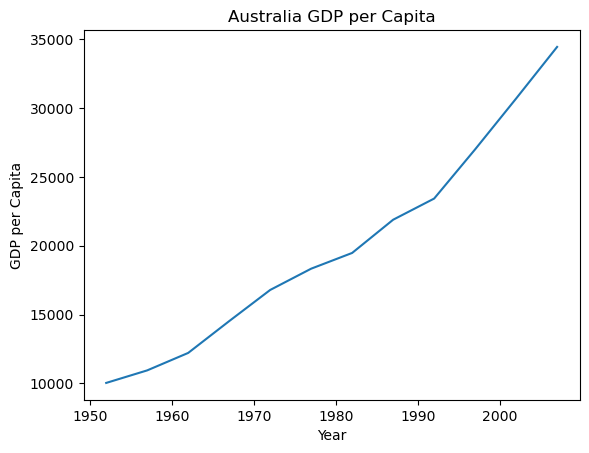

In [27]:
gdp_aust = gdp_oc_upd.loc['Australia']
plt.plot(gdp_aust)
plt.title('Australia GDP per Capita')
plt.ylabel('GDP per Capita')
plt.xlabel('Year')

## 3. Plot multiple series

Plot multiple series using `.T.plot()` and set the axis labels to `Year` and `GDP per capita` again.

Text(0.5, 1.0, 'GDP per Capita in Oceania')

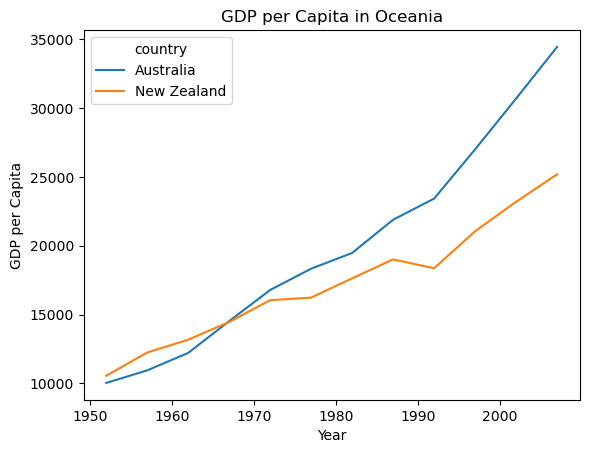

In [17]:
gdp_oc_upd.T.plot()
plt.xlabel('Year')
plt.ylabel('GDP per Capita')
plt.title('GDP per Capita in Oceania')

## 4. Plot some different types of graphs

Plot the data in the form of a bar chart, including axis labels.

Text(0, 0.5, 'GDP per Capita')

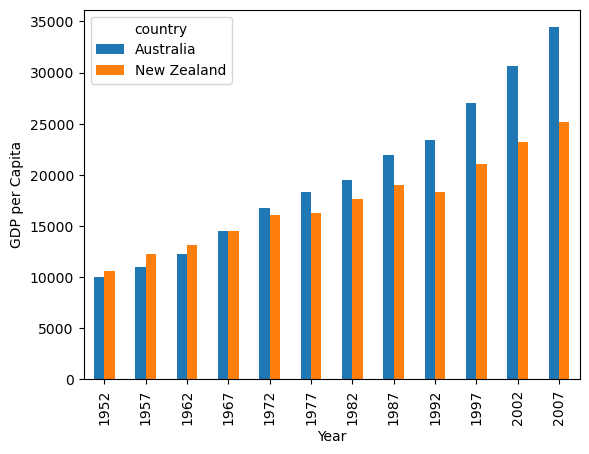

In [28]:
gdp_oc_upd.T.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('GDP per Capita')

Create a variable called `years`, setting the value as the columns from your dataframe. Create a variable called `gdp_australia` which uses `loc()` to get the data for Australia. Try making a plot by calling the `plt.plot(x,y)` function directly for `years` on the x axis and `gdp_australia` on the y axis. Plot the data using a blue dashed line.

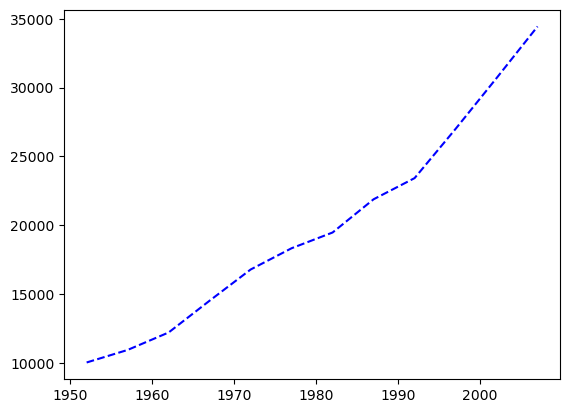

In [32]:
years = gdp_oc_upd.columns
gdp_aust = gdp_oc_upd.loc['Australia']
plt.plot(years,gdp_aust, 'b--')

Plot multiple datasets on the same graph by following the steps above for both Australia and New Zealand. Include axis labels and a legend. Plot New Zealand with a green dashed line and Australia a red dashed line.

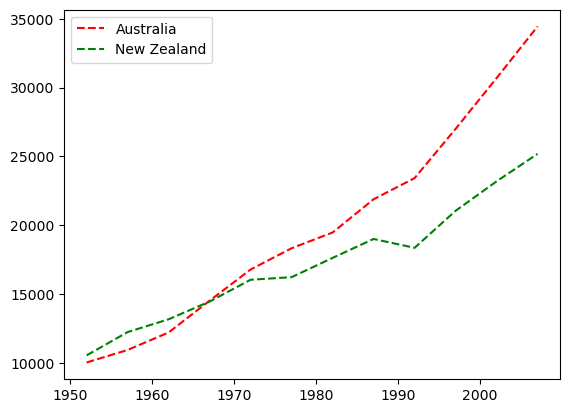

In [43]:
plt.plot(years,gdp_aust, 'r--', label = 'Australia')
gdp_newz = gdp_oc_upd.loc['New Zealand']
plt.plot(years,gdp_newz, 'g--', label = 'New Zealand')
plt.legend()

Create a scatter plot using `plt.scatter()` to compare the GDP of Australia and New Zealand.

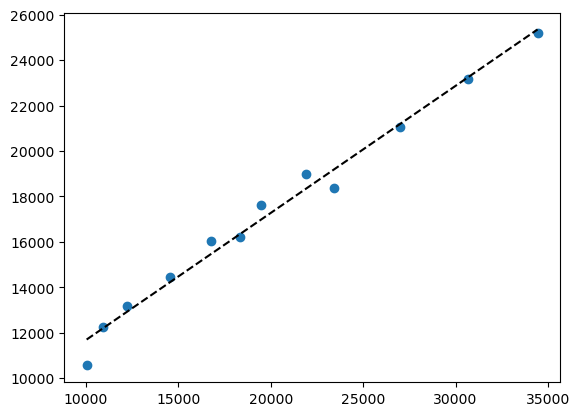

In [57]:
plt.scatter(gdp_aust,gdp_newz)

import numpy as np
m, b = np.polyfit(gdp_aust, gdp_newz, 1)

#add linear regression line to scatterplot 
plt.plot(gdp_aust, m*gdp_aust+b, 'k--')

## 5. Extension activity: Customise a plot and save it.

1. Create an x axis using `x = np.arange(0, 5, 0.1)`. Print it out to see what this line of code does.

_Hint: Remember to import `numpy` as `np`._

In [65]:
import numpy as np
x = np.arange(0,5,0.1)
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

2. Create a y axis with values $sin(x)$ using a relevant function from `numpy` with the x values from the previous question.

In [68]:
y = np.sin(x)

3. Use `pyplot` to plot these values. 

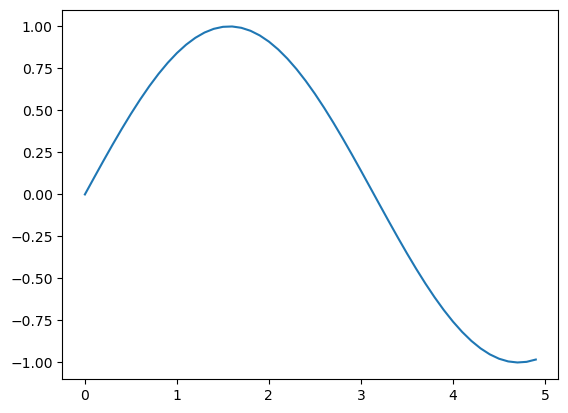

In [69]:
plt.plot(x,y)

4. Plot a cos graph on the same graph as the sin curve. Add a legend and axis labels. Customise the colours too if you like.

In [70]:
z=np.cos(x)
plt.

5. Save your plot to a file in the `images` folder using `plt.savefig('filename')`.